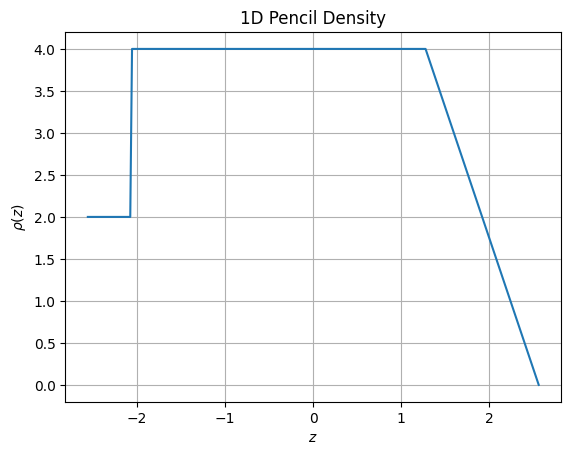

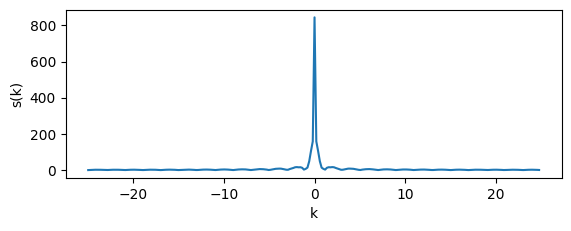

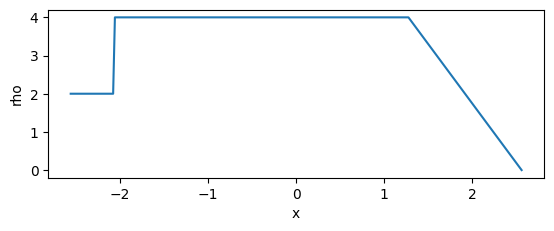

5.565937539279112e-32

In [4]:
from utilities import *
from sklearn.metrics import mean_squared_error

# get the FOV of the image
x = 2.56 # mm 
FOV = x * 2
# define the delta_x
delta_x = 0.02 # 256 points
# return the number of points by the FOV and delta_x. num_of_points on two space (x and k) are the same
num_of_points = int(x / delta_x * 2)
# set the delta_k by the FOV
delta_k = 1 / FOV # /mm^-1
# define the density profile manually
rho_0 = 4
x_axis = np.linspace(-x, x, num_of_points)
k_axis = np.linspace(-1 * num_of_points / 2 * delta_k, (num_of_points / 2 - 1) * delta_k, num_of_points)
pencil_density_profile = density_pencil(z=x, delta_z=delta_x, rho_0=rho_0, plot=True)
# get the signal in k-space from the spatial domain  
signal = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(pencil_density_profile)))
plt.plot(k_axis, np.abs(signal))
plt.xlabel('k')
plt.ylabel('s(k)')
plt.show()
# ifft the signal in k-space to get the density profile in spatial domain
rho_hat = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(signal)))
plt.plot(x_axis,np.abs(rho_hat))
plt.xlabel('x')
plt.ylabel('rho')
plt.show()
# check the mse
mse = mean_squared_error(pencil_density_profile, np.real(rho_hat))
mse